In [87]:
import os 
root = '/content/drive/MyDrive/DeepLearningColab'
os.chdir(root)
os.getcwd()

'/content/drive/MyDrive/DeepLearningColab'

In [88]:
!ls

Perceptron.ipynb


In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib 

plt.style.use('fivethirtyeight')

In [141]:
def activationFunction(inputs,weights):
  z = np.dot(weights, inputs)
  return np.where(z>0 , 1, 0)


class Perceptron:
  def __init__(self, eta, epochs, activationFunction):
    self.eta = eta 
    self.epochs = epochs
    self.activationFunction = activationFunction
    self.weights = np.random.randn(3) * 1e-4
    print(self.weights)

  def fit(self, X, y):
    self.X = X
    self.y = y

    X_with_bias = np.c_[self.X, -np.ones((len(self.X), 1))]
    print(X_with_bias)

    for epoch in range(self.epochs):
      print(f"Epoch {epoch}")
      y_hat = self.activationFunction(X_with_bias.T,self.weights)
      print(f'y_hat {y_hat}')
      error = self.y - y_hat
      print(f"Error \n{error}")
      self.weights = self.weights + self.eta * np.dot(error,X_with_bias)
      print(f"weights {self.weights}")


  def predict(self,X):
    X_with_bias = np.c_[X, -np.ones((len(X), 1))]
    return self.activationFunction(X_with_bias.T,self.weights)



In [142]:
model = Perceptron(0.1, 5, activationFunction)

[-4.40765270e-05 -8.69430914e-05 -6.43440092e-05]


In [143]:
data = {"x1": [0,0,1,1], "x2": [0,1,0,1], "y": [0,0,0,1]}

AND = pd.DataFrame(data)
AND

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [144]:
X = AND.drop("y", axis=1) # axis = 1 >>> dropping accross column
X

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [145]:
y = AND['y']
y.to_frame()
y

0    0
1    0
2    0
3    1
Name: y, dtype: int64

In [146]:
model.fit(X,y)

[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
Epoch 0
y_hat [1 0 1 0]
Error 
0   -1
1    0
2   -1
3    1
Name: y, dtype: int64
weights [-4.40765270e-05  9.99130569e-02  9.99356560e-02]
Epoch 1
y_hat [0 0 0 0]
Error 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
weights [ 9.99559235e-02  1.99913057e-01 -6.43440092e-05]
Epoch 2
y_hat [1 1 1 1]
Error 
0   -1
1   -1
2   -1
3    0
Name: y, dtype: int64
weights [-4.40765270e-05  9.99130569e-02  2.99935656e-01]
Epoch 3
y_hat [0 0 0 0]
Error 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
weights [0.09995592 0.19991306 0.19993566]
Epoch 4
y_hat [0 0 0 1]
Error 
0    0
1    0
2    0
3    0
Name: y, dtype: int64
weights [0.09995592 0.19991306 0.19993566]


In [147]:
model.predict(X)

array([0, 0, 0, 1])

#OR

In [148]:
data = {"x1": [0,0,1,1], "x2": [0,1,0,1], "y": [0,1,1,1]}
data = pd.DataFrame(data)
X = data.drop('y',axis=1)
y = data['y']

In [139]:
model = Perceptron(0.1, 5, activationFunction)
model.fit(X,y)

[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
Epoch 0
y_hat [1 1 0 1]
Error 
0   -1
1    0
2    1
3    0
Name: y, dtype: int64
weights [ 9.99298441e-02  1.30803842e-04 -1.19607470e-05]
Epoch 1
y_hat [1 1 1 1]
Error 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
weights [0.09992984 0.0001308  0.09998804]
Epoch 2
y_hat [0 0 0 1]
Error 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
weights [ 0.19992984  0.1001308  -0.10001196]
Epoch 3
y_hat [1 1 1 1]
Error 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
weights [ 1.99929844e-01  1.00130804e-01 -1.19607470e-05]
Epoch 4
y_hat [1 1 1 1]
Error 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
weights [0.19992984 0.1001308  0.09998804]


In [140]:
model.predict(X)

array([0, 1, 1, 1])

#XOR

In [149]:
data = {"x1": [0,0,1,1], "x2": [0,1,0,1], "y": [0,1,1,0]}
data = pd.DataFrame(data)
X = data.drop('y',axis=1)
y = data['y']
model = Perceptron(0.1, 5, activationFunction)
model.fit(X,y)

[ 1.82336927e-05 -1.28547466e-04  6.75732930e-06]
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
Epoch 0
y_hat [0 0 1 0]
Error 
0    0
1    1
2    0
3    0
Name: y, dtype: int64
weights [ 1.82336927e-05  9.98714525e-02 -9.99932427e-02]
Epoch 1
y_hat [1 1 1 1]
Error 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
weights [-0.09998177 -0.00012855  0.10000676]
Epoch 2
y_hat [0 0 0 0]
Error 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
weights [ 1.82336927e-05  9.98714525e-02 -9.99932427e-02]
Epoch 3
y_hat [1 1 1 1]
Error 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
weights [-0.09998177 -0.00012855  0.10000676]
Epoch 4
y_hat [0 0 0 0]
Error 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
weights [ 1.82336927e-05  9.98714525e-02 -9.99932427e-02]


In [150]:
model.predict(X)

array([1, 1, 1, 1])

In [151]:
# Single layer perceptron was unable to converge for Xor 
# Thats why we need multilayer 
# single layer perceptron was not able to capture non linearity 

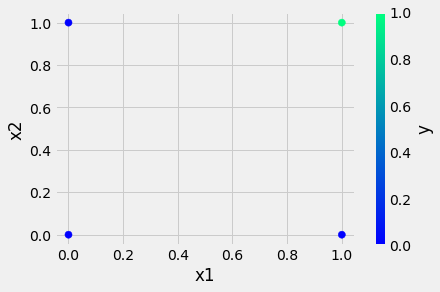

In [160]:
data = {"x1": [0,0,1,1], "x2": [0,1,0,1], "y": [0,0,0,1]}
data = pd.DataFrame(data)
data.plot(kind='scatter', x ='x1', y ='x2',c='y',cmap='winter',s=50)

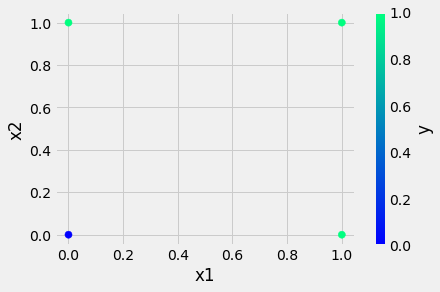

In [161]:
data = {"x1": [0,0,1,1], "x2": [0,1,0,1], "y": [0,1,1,1]}
data = pd.DataFrame(data)
data.plot(kind='scatter', x ='x1', y ='x2',c='y',cmap='winter',s=50)

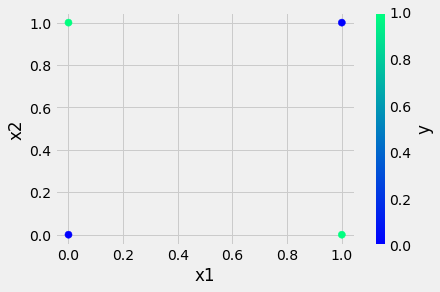

In [162]:
data = {"x1": [0,0,1,1], "x2": [0,1,0,1], "y": [0,1,1,0]}
data = pd.DataFrame(data)
data.plot(kind='scatter', x ='x1', y ='x2',c='y',cmap='winter',s=50)